In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sn
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt

from scipy.stats import loguniform

from sklearn.decomposition import PCA 

# Data preprocessing

In [111]:
ds = pd.read_csv('../Code/dataSetForML.csv')
embedded_df = pd.read_csv('../Data/embedded_data.csv')

In [15]:
print(ds.head())

   Unnamed: 0  orientation_art  progvscons_art  vote  orientation_dep  \
0           0               -1              -1  -1.0         0.428571   
1           1               -1              -1   1.0         0.428571   
2           2               -1              -1   1.0         0.428571   
3           3               -1              -1   1.0         0.428571   
4           4                0               1   1.0         0.428571   

   progvscons_dep  Genre_F  Genre_H  Âge_18-30  Âge_30-45  ...  group_AdG  \
0        0.368421        0        1          0          1  ...          0   
1        0.368421        0        1          0          1  ...          0   
2        0.368421        0        1          0          1  ...          0   
3        0.368421        0        1          0          1  ...          0   
4        0.368421        0        1          0          1  ...          0   

   group_CSPO  group_CVPO  group_INDEP  group_LES VERTS  group_PDC  \
0           0           1   

In [16]:
embedded_df.head()

,Unnamed: 0,Genre,vote,Âge_18-30,Âge_30-45,Âge_45-65,Âge_65+,embedding_1_x,embedding_2_x,embedding_3_x,...,embedding_5_x,embedding_6_x,embedding_1_y,embedding_2_y,embedding_3_y,embedding_4_y,embedding_5_y,embedding_6_y,embedding_7,embedding_8
0,0,1,-1.0,0,1,0,0,0.014835,-0.003386,-0.043191,...,-0.004045,-0.013261,0.019592,0.059957,0.153231,-0.173222,0.152732,0.231523,-0.302655,-0.200834
1,1,1,1.0,0,1,0,0,0.014835,-0.003386,-0.043191,...,-0.004045,-0.013261,0.019592,0.059957,0.153231,-0.173222,0.152732,0.231523,-0.302655,-0.200834
2,2,1,1.0,0,1,0,0,0.014835,-0.003386,-0.043191,...,-0.004045,-0.013261,0.019592,0.059957,0.153231,-0.173222,0.152732,0.231523,-0.302655,-0.200834
3,3,1,1.0,0,1,0,0,0.014835,-0.003386,-0.043191,...,-0.004045,-0.013261,0.019592,0.059957,0.153231,-0.173222,0.152732,0.231523,-0.302655,-0.200834
4,4,1,1.0,0,1,0,0,0.014835,-0.003386,-0.043191,...,-0.004045,-0.013261,0.019592,0.059957,0.153231,-0.173222,0.152732,0.231523,-0.302655,-0.200834


### Feature Engineering

Checking for axes containing NaN values 

In [17]:
print(np.isnan(ds).any(axis=0))

Unnamed: 0                 False
orientation_art            False
progvscons_art             False
vote                       False
orientation_dep            False
progvscons_dep             False
Genre_F                    False
Genre_H                    False
Âge_18-30                  False
Âge_30-45                  False
Âge_45-65                  False
Âge_65+                    False
District_Brig              False
District_Conthey           False
District_Entremont         False
District_Goms              False
District_Hérens            False
District_Leuk              False
District_Martigny          False
District_Monthey           False
District_Sierre            False
District_Sion              False
District_St-Maurice        False
District_Visp              False
District_Westlich Raron    False
District_Östlich Raron     False
group_AC                   False
group_AdG                  False
group_CSPO                 False
group_CVPO                 False
group_INDE

There are NaN in the 'vote' column. It means that some deputees did not vote for some articles. <br/>
We delete those lines.

In [18]:
ds = ds[~np.isnan(ds).any(axis=1)]

Delete the row if the value of 'vote' is 0 (it means that the deputee voted blank)

In [19]:
ds = ds[ds['vote'] != 0]

In [20]:
ds = ds.reset_index(drop=True)

### Separate and create variables

In [21]:
# Divide into features and labels 

X_data = ds.iloc[:, 1:37]
X_data = X_data.drop('vote', axis=1)

Labels = ds.iloc[:, [3]]

# Model Selection for Binary Classification

We started by fitting 6 differents models on a specific dataset split, obtained by taking 80% of our initial dataset as our train test and 20% as our test set. For each model, we looked at their confusion matrix and their f1 score to determine their accuracy.

We fitted the following models : 
- Logistic Regression
- K-Nearest Neighbours
- Decision Tree 
- Support Vector Machine
- Naive Bayes 
- Gradient Boosting

In [22]:
# Split the dataset (20% as test set)
X_train, X_test, y_train, y_test = train_test_split(X_data, Labels, test_size=0.2, random_state=0)

# Logistic Regression

In [23]:
# Train the model : logistic Regression
y_train = np.ravel(y_train)

model = LogisticRegression(solver='liblinear', random_state=0)
H = model.fit(X_train, y_train)

In [24]:
print('Logistic Regression Model Coeff (m) =' , model.coef_)
print('Logistic Regression Model Coeff (b) =' , model.intercept_)

Logistic Regression Model Coeff (m) = [[ 6.60137521e-02 -3.01326869e-01 -8.74843075e-02 -6.80389714e-01
   2.55998941e-05  1.76566450e-02  2.89908258e-02 -1.84605528e-02
   4.11965859e-03  3.03231322e-03  1.88486046e-01  4.84530170e-04
   7.66739680e-02  3.91607919e-03  2.65896946e-01  3.51738508e-02
  -3.44639385e-02  5.00509308e-02 -2.69547638e-02 -2.88098341e-02
   1.84971617e-02  5.59189738e-04 -1.57029895e-01 -3.74798026e-01
  -1.82142333e-01 -1.01749761e-01  3.85849235e-01  3.33225726e-02
  -3.74798026e-01 -2.14125244e-01  7.62041932e-01 -2.87982201e-02
  -3.07141680e-01  3.64492086e-01 -3.19268317e-01]]
Logistic Regression Model Coeff (b) = [0.01768224]


In [25]:
# Predicting the data

y_predict=model.predict(X_test)
print(y_predict)

[ 1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.
  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.
 -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1.  1.
  1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1.
  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.
  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [26]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, model.predict(X_test)))


Confusion Matrix : 
 [[108 267]
 [ 87 456]]


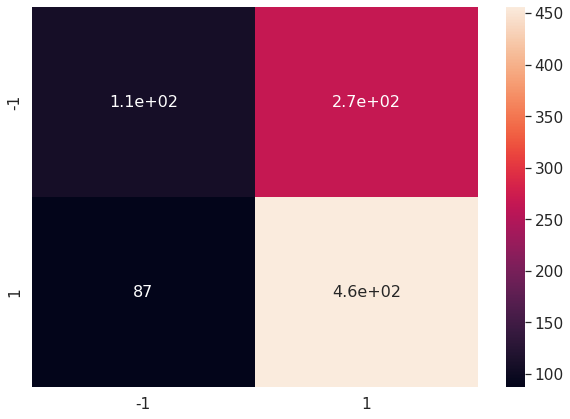

In [27]:
# Plot Confusion Matrix 

cm = confusion_matrix(y_test, model.predict(X_test))

df_cm = pd.DataFrame(cm,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [28]:
# Print Classification Report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.55      0.29      0.38       375
         1.0       0.63      0.84      0.72       543

    accuracy                           0.61       918
   macro avg       0.59      0.56      0.55       918
weighted avg       0.60      0.61      0.58       918



# K-Nearest Neighbors 

In [29]:
# Train the KNN classifier on the training data
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(X_train, y_train)

# Evaluate the classifier on the test data
score = classifier.score(X_test, y_test)

In [30]:
print(score)

0.7429193899782135


In [31]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, classifier.predict(X_test)))


Confusion Matrix : 
 [[243 132]
 [104 439]]


In [32]:
# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.7881508078994613


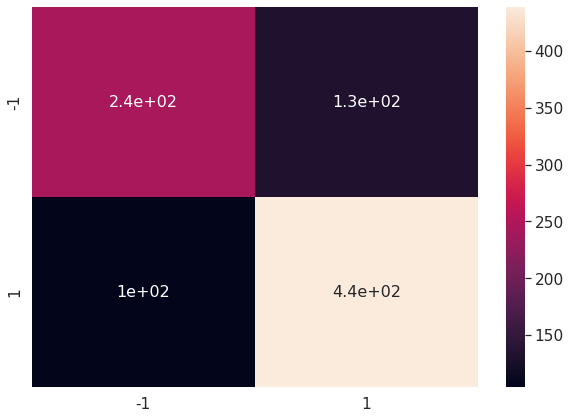

In [33]:
# Plot Confusion Matrix 

cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [34]:
# Print Classification Report

print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.70      0.65      0.67       375
         1.0       0.77      0.81      0.79       543

    accuracy                           0.74       918
   macro avg       0.73      0.73      0.73       918
weighted avg       0.74      0.74      0.74       918



# Decision Tree

In [35]:
# Train the decision tree classifier on the training data
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_classifier.predict(X_test)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.7590697674418604


In [36]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, tree_classifier.predict(X_test)))


Confusion Matrix : 
 [[251 124]
 [135 408]]


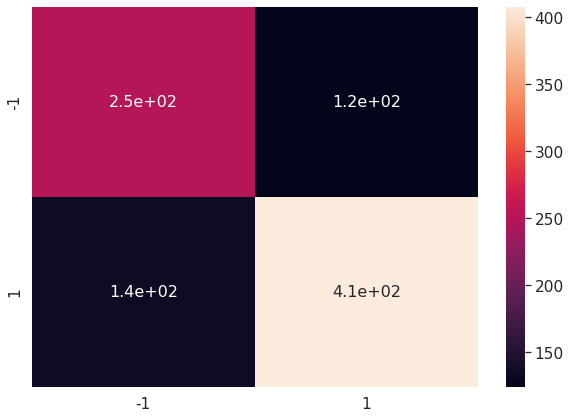

In [37]:
# Compute the confusion matrix
cm_tree = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm_tree,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [38]:
# Print Classification Report

print(classification_report(y_test, tree_classifier.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.65      0.67      0.66       375
         1.0       0.77      0.75      0.76       543

    accuracy                           0.72       918
   macro avg       0.71      0.71      0.71       918
weighted avg       0.72      0.72      0.72       918



# Support Vector Machine

In [39]:
# Train the decision tree classifier on the training data
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.8218243819266836


In [40]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, svm_classifier.predict(X_test)))


Confusion Matrix : 
 [[227 148]
 [ 61 482]]


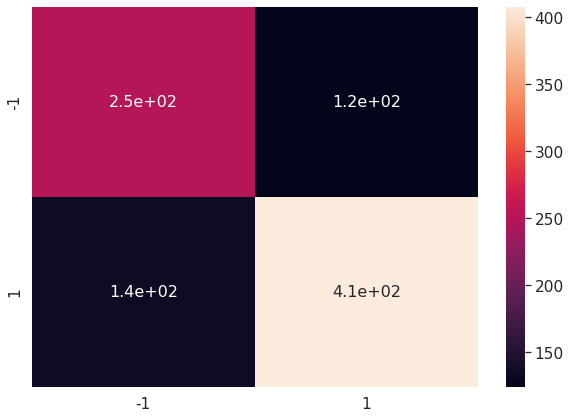

In [41]:
# Compute the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm_tree,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [42]:
# Print Classification Report

print(classification_report(y_test, svm_classifier.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.79      0.61      0.68       375
         1.0       0.77      0.89      0.82       543

    accuracy                           0.77       918
   macro avg       0.78      0.75      0.75       918
weighted avg       0.77      0.77      0.77       918



# Naive Bayes

In [43]:
# Train the decision tree classifier on the training data
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bayes_classifier.predict(X_test)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.6996587030716724


In [44]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, bayes_classifier.predict(X_test)))


Confusion Matrix : 
 [[156 219]
 [133 410]]


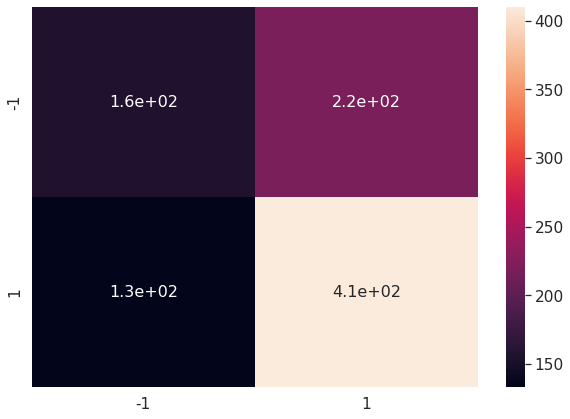

In [45]:
# Compute the confusion matrix
cm_bayes = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm_bayes,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [46]:
# Print Classification Report

print(classification_report(y_test, bayes_classifier.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.54      0.42      0.47       375
         1.0       0.65      0.76      0.70       543

    accuracy                           0.62       918
   macro avg       0.60      0.59      0.58       918
weighted avg       0.61      0.62      0.61       918



# Gradient Boosting

In [47]:
# Train a gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.8238341968911918


In [48]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, gbc.predict(X_test)))


Confusion Matrix : 
 [[237 138]
 [ 66 477]]


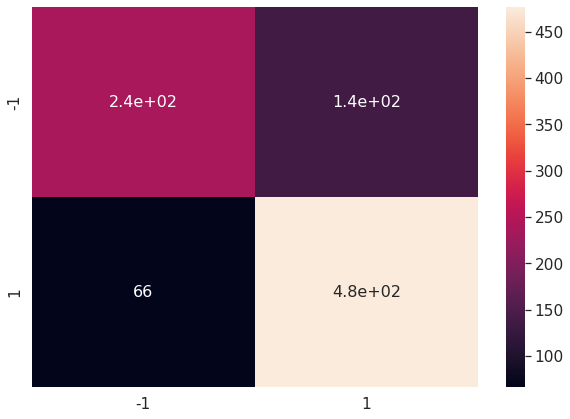

In [49]:
# Compute the confusion matrix
cm_bayes = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm_bayes,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [50]:
# Print Classification Report

print(classification_report(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.78      0.63      0.70       375
         1.0       0.78      0.88      0.82       543

    accuracy                           0.78       918
   macro avg       0.78      0.76      0.76       918
weighted avg       0.78      0.78      0.77       918



Based on the f1 score of each model, it seems that Gradient Boosting and Support Vector Machine are the most accurate methods for this specific data set split.

- f1 score (gradient boosting) = 0.82 
- f1 score (svm) = 0.82

To confirm this intuition that SVM and Gradient Boosting are accurate in guessing the vote of a deputee on an article, we will perform k-fold crossvalidation

# K-fold crossvalidation

Cross-validation (k-fold cross-validation) is a method for estimating the skill of our models. In standard  k-fold cross-validation, we divide the data into k subsets, called folds. Then, we iteratively train the algorithm on k−1  folds while using the remaining fold as a test set. In our case, we will use 5 folds.

This technique will allow us to confirm the accuracy statistics we will obtain. We will show that the values are not due to a "lucky guess".

In [51]:
Labels = Labels.reset_index(drop=True)
X_data.reset_index(drop=True)

,orientation_art,progvscons_art,orientation_dep,progvscons_dep,Genre_F,Genre_H,Âge_18-30,Âge_30-45,Âge_45-65,Âge_65+,...,group_AdG,group_CSPO,group_CVPO,group_INDEP,group_LES VERTS,group_PDC,group_SVPO,group_UDC,group_VLR,group_ZUK-VS
0,-1,-1,0.428571,0.368421,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-1,-1,0.428571,0.368421,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-1,-1,0.428571,0.368421,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-1,-1,0.428571,0.368421,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0.428571,0.368421,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,0,-1,0.500000,0.541667,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4584,0,-1,0.500000,0.541667,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4585,1,-1,0.500000,0.541667,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4586,-1,-1,0.500000,0.541667,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
# Create a k-fold cross-validation iterator
gbc_kfold = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 10, max_depth = 3)
#logistic_kfold = LogisticRegression(solver='liblinear', random_state=0)
#knn_kfold = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
#tree_kfold = DecisionTreeClassifier()
#bayes_kfold = GaussianNB()


In [53]:
kfold = KFold(n_splits=5)

# Loop through the k folds and fit the model on each train fold
# and evaluate it on the corresponding test fold
for train_indices, test_indices in kfold.split(X_data):
  X_train = X_data.loc[train_indices, :]
  y_train = Labels.loc[train_indices, :]
  X_test = X_data.loc[test_indices, :]
  y_test = Labels.loc[test_indices, :]
  gbc_kfold.fit(X_train, y_train)
  print(gbc_kfold.score(X_test, y_test))

/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

0.7472766884531591
0.8202614379084967
0.7440087145969498
0.787350054525627
0.7600872410032715


/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

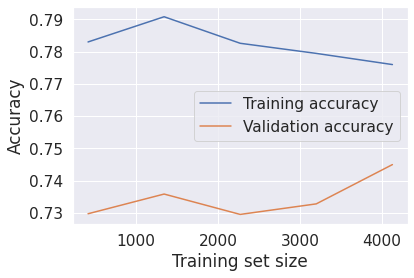

In [54]:
# Use learning_curve() to compute the training and validation accuracies for different training set sizes
train_sizes, train_scores, val_scores = learning_curve(gbc_kfold, X_data, Labels, cv=10)

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training accuracy')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
svm_kfold = SVC()
kfold = KFold(n_splits=5)

# Loop through the k folds and fit the model on each train fold
# and evaluate it on the corresponding test fold
for train_indices, test_indices in kfold.split(X_data):
  X_train = X_data.loc[train_indices, :]
  y_train = Labels.loc[train_indices, :]
  X_test = X_data.loc[test_indices, :]
  y_test = Labels.loc[test_indices, :]
  svm_kfold.fit(X_train, y_train)
  print(svm_kfold.score(X_test, y_test))

/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7472766884531591


/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8224400871459695


/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7494553376906318


/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7938931297709924


/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.772082878953108


/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

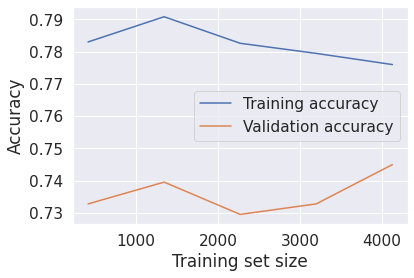

In [56]:
# Use learning_curve() to compute the training and validation accuracies for different training set sizes
train_sizes, train_scores, val_scores = learning_curve(gbc_kfold, X_data, Labels, cv=10)

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training accuracy')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Dimensionality reduction techniques

## PCA

The PCA algorithm first standardizes the input data frame and calculates the covariance matrix of the features.

Each row (composed of n dimensions if there are n features in the dataset) is considered as a vector pointing in some direction. These vectors are "averaged" by generating another vector that "points" more or less in the same direction as all those averaged vectors : they are the so-called eigenvectors. 

We sort the eigenvectors by their eigenvalues (their  length). 

We finally choose the eigenvectors which add up to the desired threshold of explained variance.

The standardized feature data frame is multiplied by the matrix of principal components (of eignvectors) and as a result we obtain the compressed representation of the input data.

In the following code, we get the information about the explained variance from the scikit-learn implementation and we plot the cumulative variance to now how many components we need to get the desired threshold of explained variance.

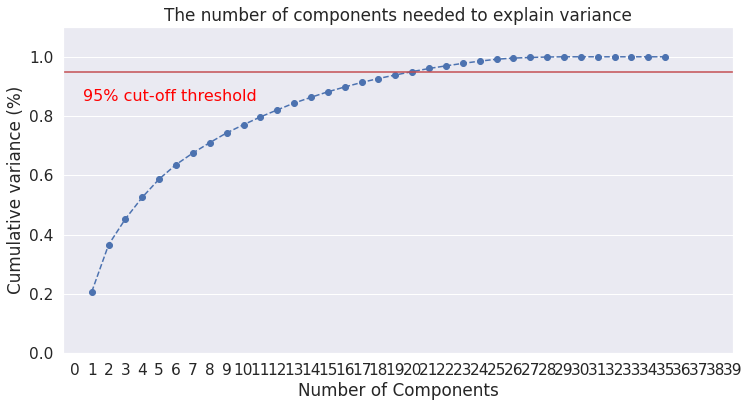

In [57]:
pca = PCA().fit(X_data)

#matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 36, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 40, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

To get 95% of variance explained we need 20 principal components.

We can now apply the dimensionality reduction method to our dataset, creating a sub set : X_data_pca

In [58]:
pca = PCA(n_components=20)
pca.fit(X_data)
X_data_pca = pca.transform(X_data)

We can now fit the same models as before on this new dataset.

### K-Fold PCA Gradient Boosting

In [59]:
Labels = np.ravel(Labels)

gbc = GradientBoostingClassifier()
gbc.fit(X_data_pca, Labels)

# Evaluate the model using k-fold cross validation

k = 10
scores_gbc = cross_val_score(gbc, X_data_pca, Labels, cv=k)

# Print the average accuracy and the standard deviation
print(scores_gbc)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_gbc.mean(), scores_gbc.std() * 2))

[0.67973856 0.58605664 0.66884532 0.71459695 0.67538126 0.66448802
 0.71459695 0.77342048 0.71179039 0.76637555]
Accuracy: 0.70 (+/- 0.10)


### K Fold PCA SVM

In [60]:
Labels = np.ravel(Labels)

svm = SVC()
svm.fit(X_data_pca, Labels)

# Evaluate the model using k-fold cross validation

k = 10
scores_svm = cross_val_score(svm, X_data_pca, Labels, cv=k)

# Print the average accuracy and the standard deviation
print(scores_svm)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

[0.77559913 0.65577342 0.72984749 0.78213508 0.72766885 0.69716776
 0.74727669 0.78431373 0.78165939 0.73362445]
Accuracy: 0.74 (+/- 0.08)


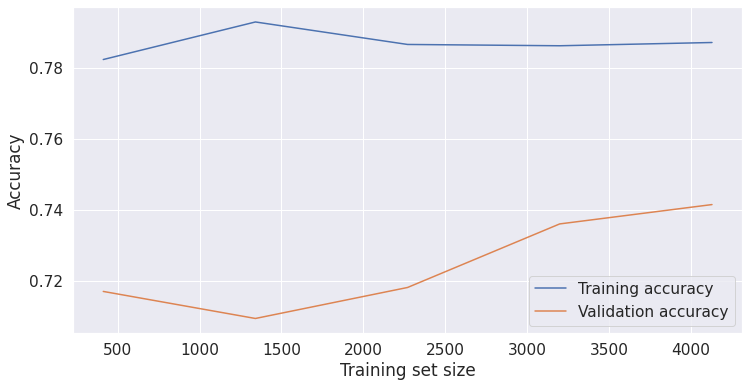

In [61]:
# Use learning_curve() to compute the training and validation accuracies for different training set sizes
train_sizes, train_scores, val_scores = learning_curve(svm, X_data_pca, Labels, cv=10)

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training accuracy')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### K Fold PCA Naive Bayes

In [62]:
bayes = GaussianNB()
bayes.fit(X_data_pca, Labels)

# Evaluate the model using k-fold cross validation

k = 10
scores_bayes = cross_val_score(bayes, X_data_pca, Labels, cv=k)

# Print the average accuracy and the standard deviation
print(scores_bayes)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_bayes.mean(), scores_bayes.std() * 2))


[0.61002179 0.59041394 0.59694989 0.62309368 0.62309368 0.53594771
 0.64923747 0.58823529 0.62227074 0.54803493]
Accuracy: 0.60 (+/- 0.07)


### K Fold PCA Decision Tree

In [63]:
tree = DecisionTreeClassifier()
tree.fit(X_data_pca, Labels)

# Evaluate the model using k-fold cross validation

k = 10
scores_tree = cross_val_score(tree, X_data_pca, Labels, cv=k)

# Print the average accuracy and the standard deviation
print(scores_tree)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))

[0.5795207  0.51198257 0.59259259 0.65795207 0.61873638 0.67102397
 0.65577342 0.67973856 0.63755459 0.66157205]
Accuracy: 0.63 (+/- 0.10)


### K Fold PCA KNN

In [64]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_data_pca, Labels)

# Evaluate the model using k-fold cross validation

k = 10
scores_knn = cross_val_score(knn, X_data_pca, Labels, cv=k)

# Print the average accuracy and the standard deviation
print(scores_knn)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))


[0.70588235 0.60784314 0.69063181 0.67973856 0.67538126 0.66884532
 0.70152505 0.75381264 0.6419214  0.68995633]
Accuracy: 0.68 (+/- 0.07)


### K Fold PCA Logistic Reg

In [65]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_data_pca, Labels)

# Evaluate the model using k-fold cross validation

k = 10
scores_lr = cross_val_score(lr, X_data_pca, Labels, cv=k)

# Print the average accuracy and the standard deviation
print(scores_lr)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_lr.mean(), scores_lr.std() * 2))

[0.5751634  0.63398693 0.7037037  0.62527233 0.65795207 0.51633987
 0.68627451 0.60784314 0.63755459 0.57423581]
Accuracy: 0.62 (+/- 0.11)


# Hyperparameters tuning

In [66]:
# Create a dictionary of hyperparameters to tune
params = {'n_estimators': [1, 2, 5, 10, 20, 50, 100, 200, 500],
          'max_depth': [3, 4, 5, 7, 10, 20, 50, 100],
          'learning_rate': [0.01, 0.1, 0.2, 0.5, 1]}

# Use grid search to tune the hyperparameters
gbc_cv = GridSearchCV(gbc, param_grid=params, cv=5)
gbc_cv.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", gbc_cv.best_params_)

/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

KeyboardInterrupt: 

In [ ]:
# Train a gradient boosting classifier
gbc = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 10, max_depth = 3)
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc.predict(X_test)

# Print Classification Report
print(classification_report(y_test, gbc.predict(X_test)))

# Feature Embedding 

In [112]:
#embedded_df = embedded_df.reset_index(drop=True)

In [113]:
Labels = pd.DataFrame(embedded_df['vote'])
X_edata = embedded_df.drop(['vote','Unnamed: 0'] , axis=1)

In [114]:
print(X_edata.shape)
print(Labels.shape)

(4588, 23)
(4588, 1)


## Gradient Boosting

In [119]:
# Create a k-fold cross-validation iterator
gbc_kfold_emb = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 10, max_depth = 3)
#logistic_kfold = LogisticRegression(solver='liblinear', random_state=0)
#knn_kfold = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
#tree_kfold = DecisionTreeClassifier()
#bayes_kfold = GaussianNB()
#svm_kfold = SVC()

In [128]:
kfold = KFold(n_splits=5)
x=0
# Loop through the k folds and fit the model on each train fold
# and evaluate it on the corresponding test fold
for train_indices, test_indices in kfold.split(X_data):
    #print(train_indices)
    X_train = X_edata.loc[train_indices, :]
    y_train = Labels.loc[train_indices, :]
    X_test = X_edata.loc[test_indices, :]
    y_test = Labels.loc[test_indices, :]
    gbc_kfold_emb.fit(X_train, y_train.values.ravel())
    #print(gbc_kfold_emb.weights)
    x +=  gbc_kfold_emb.score(X_test, y_test)
    print(gbc_kfold_emb.score(X_test, y_test))
print(x/5)

0.7429193899782135
0.8202614379084967
0.7363834422657952
0.7884405670665212
0.7611777535441657
0.7698365181526385


## SVM

In [126]:
svm_kfold = SVC()

In [127]:
kfold = KFold(n_splits=5)
x=0
# Loop through the k folds and fit the model on each train fold
# and evaluate it on the corresponding test fold
for train_indices, test_indices in kfold.split(X_data):
    #print(train_indices)
    X_train = X_edata.loc[train_indices, :]
    y_train = Labels.loc[train_indices, :]
    X_test = X_edata.loc[test_indices, :]
    y_test = Labels.loc[test_indices, :]
    svm_kfold.fit(X_train, y_train.values.ravel())
    #print(gbc_kfold_emb.weights)
    x +=  svm_kfold.score(X_test, y_test)
    print(svm_kfold.score(X_test, y_test))
print(x/5)

0.7418300653594772
0.8344226579520697
0.7418300653594772
0.7764449291166848
0.7622682660850599
0.7713591967745537
